#### 一、环境配置

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
# 修改imputer为SimpleImputer
# from sklearn.preprocessing import Imputer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import label_binarize
from sklearn import metrics
# from sklearn.metrics import roc_curve, auc, roc_auc_score

#### 二、配置数据信息

In [3]:
# 定义根路径
root = '/Users/authorcai/Documents/Authorcai/CSH/FM智能检测矫正服/Data/UCI_HAR_Dataset/'

In [5]:
# 读取数据
features = pd.read_csv(root + 'features.txt', sep='\s+', index_col=0, header=None)
train_data = pd.read_csv(root + 'train/X_train.txt', sep='\s+', names=list(features.values.ravel()))
test_data = pd.read_csv(root + 'test/X_test.txt', sep='\s+', names=list(features.values.ravel()))
train_label = pd.read_csv(root + 'train/y_train.txt', sep='\s+', header=None)
test_label = pd.read_csv(root + 'test/y_test.txt', sep='\s+', header=None)
label_name = pd.read_csv(root + 'activity_labels.txt', sep='\s+', header=None)


ValueError: Duplicate names are not allowed.

##### （一）处理空值

In [4]:
train_data.replace("?",np.NaN)
test_data.replace("?",np.NaN)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,0.071645,-0.330370,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.401189,-0.121845,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,0.062891,-0.190422,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,0.116695,-0.344418,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.121711,-0.534685,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857
5,0.279220,-0.018620,-0.113902,-0.994455,-0.970417,-0.965316,-0.994585,-0.969481,-0.965897,-0.937856,...,0.083603,-0.493517,-0.857565,-0.095681,0.048849,0.760684,-0.072216,-0.689816,0.294896,-0.068471
6,0.279746,-0.018271,-0.104000,-0.995819,-0.976354,-0.977725,-0.995996,-0.973665,-0.979253,-0.937856,...,0.272339,-0.093855,-0.391286,-0.309083,-0.000857,0.728514,-0.333771,-0.690085,0.295282,-0.067065
7,0.274601,-0.025035,-0.116831,-0.995594,-0.982069,-0.985262,-0.995341,-0.981485,-0.984610,-0.941263,...,0.213799,-0.338123,-0.672358,-0.025526,-0.214033,0.437640,-0.366674,-0.688785,0.295981,-0.067706
8,0.272529,-0.020954,-0.114472,-0.996784,-0.975906,-0.986597,-0.997029,-0.973735,-0.985556,-0.941263,...,0.283428,-0.629599,-0.853248,0.144626,-0.035564,-0.181800,0.087320,-0.685390,0.299394,-0.065491
9,0.275746,-0.010372,-0.099776,-0.998373,-0.986933,-0.991022,-0.998663,-0.987140,-0.991084,-0.943761,...,0.384437,-0.469743,-0.741435,0.157584,-0.033487,-0.350893,0.343146,-0.684110,0.300822,-0.064263


##### （二）处理缺省值

In [5]:
# 空

##### （三）训练集和测试集信息说明

In [6]:
print("训练集样本模型:%d，特征属性：%d, 目标属性:%d " %(train_data.shape[0],train_data.shape[1],train_label.shape[1]))

训练集样本模型:7352，特征属性：561, 目标属性:1 


##### （四）数据标准化

In [40]:
# 降维
# 可将n_component修改为其他整数k，即可降维至k维
pca = PCA(n_components=8)
train_data_new = pca.fit_transform(train_data)
test_data_new = pca.transform(test_data)

# 查看降维结果
print(train_data.shape)
print(test_label.shape)

print(pca.explained_variance_ratio_)

(7352, 561)
(2947, 1)
[0.6255444  0.04913023 0.04121467 0.01874956 0.0169486  0.01272069
 0.01176685 0.01068973]


#### 测试代码开始

In [36]:
#制作训练集和测试集，使格式符合sklean算法要求
x_train=train_data.iloc[:,:-2].values
x_test=train_data.iloc[:,-2].values
y_train=test_data.iloc[:,:-2].values
y_test=test_data.iloc[:,-2].values

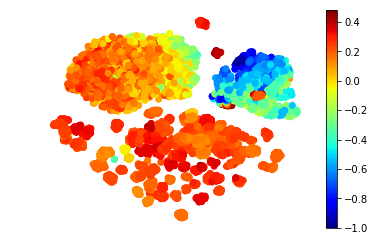

In [37]:

#对数据进行降维可视化
#使用t-sne进行可视化分析
from sklearn.manifold import TSNE
tsne=TSNE(n_components=2)#调入t-sne(将数据降成二维)
out=tsne.fit_transform(x_train)#使用t-sne，处理数据
plt.scatter(out[:, 0], out[:, 1], c=x_test,cmap='jet')#画图
plt.axis('off')
plt.colorbar()
plt.show()

#### 测试代码结束

In [8]:
print(train_data_new.shape)
print(test_data_new.shape)

(7352, 8)
(2947, 8)


#### 三、建立随机森林模型训练

##### （一）构建模型

In [9]:
# 通过分类器建立随机森林模型
# 迭代次数为100次(100个决策树)
# 设置为gini系数
# 设置深度为1（一般为1～3）
forest = RandomForestClassifier(n_estimators=140,criterion='entropy',max_depth=5,random_state=0)

##### （二）训练模型

In [10]:
# 将决策树作为弱分类器
forest.fit(train_data_new,train_label)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=140,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

##### （三）评估模型

In [11]:
# 通过score接口
score = forest.score(test_data_new, test_label)
print("模型的准确率为：%.2f%%" %(score*100))

模型的准确率为：82.25%


##### （四）模型预测

In [12]:
forest_y_score = forest.predict_proba(train_data_new)

In [13]:
forest_y_score

array([[7.83318113e-04, 8.51719061e-03, 1.82992785e-02, 2.89342697e-01,
        6.11713917e-01, 7.13435989e-02],
       [1.13371977e-03, 1.18133229e-03, 2.54318639e-03, 6.21383384e-01,
        3.37540123e-01, 3.62182553e-02],
       [3.38035163e-03, 6.68987498e-03, 3.83532147e-03, 3.34544507e-01,
        5.90113554e-01, 6.14363914e-02],
       ...,
       [3.60853647e-01, 5.08759557e-01, 1.00042714e-01, 1.71455500e-02,
        2.61206201e-03, 1.05864708e-02],
       [3.90653208e-01, 4.96121368e-01, 8.69354886e-02, 1.22645138e-02,
        3.75037018e-03, 1.02750513e-02],
       [1.37290390e-01, 7.84881023e-01, 5.92468831e-02, 7.51864452e-03,
        4.72386068e-03, 6.33919786e-03]])

In [14]:
# 查看属于不同类别的概率
# 0-5分别对应
names = ["WALKING","WAIKING_UPATAIRS","WALKING_DOWNSTAIRS","SITTING","STANDING","LAYING"]
# 获取分类结果赋值给probability
probability = pd.DataFrame(forest_y_score,columns=names)
# 查看分类结果
probability.head(10)

,WALKING,WAIKING_UPATAIRS,WALKING_DOWNSTAIRS,SITTING,STANDING,LAYING
0,0.000783,0.008517,0.018299,0.289343,0.611714,0.071344
1,0.001134,0.001181,0.002543,0.621383,0.337540,0.036218
2,0.003380,0.006690,0.003835,0.334545,0.590114,0.061436
3,0.001439,0.001167,0.002979,0.619762,0.344686,0.029968
4,0.009570,0.001215,0.008457,0.424990,0.495418,0.060349
5,0.003845,0.006639,0.003835,0.378406,0.535594,0.071681
6,0.001704,0.001606,0.003190,0.219637,0.724889,0.048974
7,0.001757,0.001347,0.002354,0.580176,0.378765,0.035601
8,0.001278,0.000459,0.001216,0.240006,0.682111,0.074930
9,0.034699,0.008484,0.002344,0.233210,0.633751,0.087513


#### 四、结果分析

##### （一）重要程度分析

In [15]:
importances = forest.feature_importances_
importances_rank = pd.DataFrame(importances)
importances_rank.head(5)

,0
0,0.378601
1,0.052800
2,0.341747
3,0.040331
4,0.072741


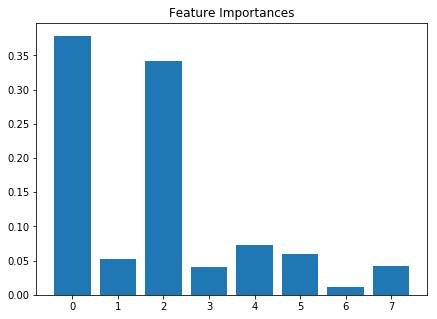

In [16]:
f, ax = plt.subplots(figsize=(7, 5))
ax.bar(range(len(forest.feature_importances_)), forest.feature_importances_)
ax.set_title("Feature Importances")
plt.show()

In [29]:
pd.DataFrame(forest_y_score).head(5)
#test_label[0]

,0,1,2,3,4,5
0,0.000783,0.008517,0.018299,0.289343,0.611714,0.071344
1,0.001134,0.001181,0.002543,0.621383,0.337540,0.036218
2,0.003380,0.006690,0.003835,0.334545,0.590114,0.061436
3,0.001439,0.001167,0.002979,0.619762,0.344686,0.029968
4,0.009570,0.001215,0.008457,0.424990,0.495418,0.060349


##### （二）结果可视化

In [35]:
# Roc曲线
# 计算fpr和tpr
# forest_fpr, forest_tpr, _ = metrics.roc_curve(label_binarize(test_label[0],
#                                                              classes=(0,1,2,3,4,5)).T[0:-1].T.ravel),
#                                               forest_y_score[0].ravel())
# 定性化
# 求auc
fpr, tpr, thresholds = metrics.roc_curve(test_label,forest_y_score[0])


ValueError: multiclass format is not supported

In [136]:
predictions_validation = forest_y_score[:,1]
fpr, tpr, _ = metrics.roc_curve(test_label, predictions_validation)
roc_auc = metrics.auc(fpr, tpr)

plt.title("ROC Validation")
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0.1])
plt.ylabel('True Postive Rate')
plt.xlabel('False Postive Rate')
plt.show()

ValueError: multiclass format is not supported

##### （五）模型评价

* 使用随机森林模型可以有效地分辨静态姿势和动态姿势
* 在使用随机森林模型处理时，对静态姿势的分类存在缺陷（不足）
* 随机森林模型在辨别sitting 和 standing分类时，存在较大缺陷

#### 四、可结合其他机器学习方法

##### （一）使用线性模型处理

* 略